# Differentially Abundant Proteins identification

In [36]:
#Third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

#Import custom code
sys.path.append("..")
from Pipelines.DAP import DifferentiallyAbundantProteins as DAP

## Load data

### Proteomic data

In [2]:
#Read datafile
proteomics_data = pd.read_csv("C:/Users/keimp/AAA_AMC/data/20250331 AAA plasma proteomics raw data.csv", delimiter=";")
#Rotate data into wide format
proteomics_data = proteomics_data.transpose()
#Convert the samples into a column
proteomics_data = proteomics_data.reset_index()
#Make the first row the column names
proteomics_data.columns = proteomics_data.iloc[0]
proteomics_data = proteomics_data[1:]
#rename sample column
proteomics_data = proteomics_data.rename(columns={'Genes': 'Sample_index'})
#Get the proteins
proteins = proteomics_data.columns.values.tolist()[1:]
#Display data
proteomics_data.head()

0 Sample_index             MAPK1              F8A1             SUGT1  \
1     Sample 2  10,2021037641938  7,77004295752591   9,7872781528247   
2     Sample 3  9,95374109134794  8,41666297789424  7,67427945786494   
3     Sample 7   10,487751346645  8,31482611404827  9,61804457002126   
4     Sample 8  9,48739286676081               NaN  8,50434663859492   
5    Sample 10  10,0264651155008   8,1819238084595  9,06707219766363   

0              RBX1              PEPD             EEF1G              VTA1  \
1  9,26370554217648  8,23896967303222  10,9677746493776  8,46817153636245   
2  9,46321339426164  7,63321292615283  12,9130321368775  9,32274820970449   
3  9,38497919855656   8,6228010812296  11,5247747345672  8,98458491210694   
4  9,08118952225239  7,63237106251721  12,1390934923631  8,92280285668281   
5  9,17290226725733   7,8929337014902  11,5330085280701  8,77145409145069   

0              LSM5             PFDN1  ...             TTYH3  \
1  8,41618657308795  9,44879552570698  ...   7,5527272635264   
2  10,0325271375203  10,1368924410588  ...  8,40012620227025   
3  9,30733755978394  10,3798430579532  ...  7,50722502070951   
4  8,70767498111592  9,36722239151231  ...  8,03130193267757   
5  9,00066020926677   9,4884227753092  ...  8,41136764925617   

0          IGLV5-37               MDK            LILRA3              DBNL  \
1  7,21125993935436               NaN               NaN  9,29133435958485   
2  7,03044943589954  8,94556816872126               NaN  10,4156171411576   
3               NaN               NaN               NaN  9,40854173840688   
4               NaN  6,75867481998469               NaN  9,94218798213109   
5   7,2339657138158               NaN  7,85524183016482  10,1897322682088   

0           CAPRIN1            CSNK2B S100P              LSM2  \
1  7,47924617898486  8,89534057748836   NaN  8,24855801587548   
2  7,53687874399697  10,0062870240963   NaN  10,2500660183215   
3  7,52837793283338  9,37451072496721   NaN  9,27398180171813   
4   7,4509509745916  9,41601986428657   NaN  8,69864112155735   
5  7,11441992786166  9,28172772785601   NaN  9,07661450816821   

0             LMAN1  
1  7,42552575185176  
2  7,86390680295416  
3  8,22795784851805  
4   8,6319119489518  
5  8,14783406820925  

[5 rows x 1897 columns]

### Meta data

In [3]:
meta_data = pd.read_csv("C:/Users/keimp/AAA_AMC/data/plasma_proteomics_meta_file_rawDataCSV.csv", delimiter=";")
meta_data.head()

Sample_index  Measurement_index Proposed_batch Inclusion Date_surgery  \
0     Sample 2                  2             B1   Include          NaN   
1     Sample 3                  3             B1   Include          NaN   
2     Sample 7                  8             B1   Include          NaN   
3     Sample 8                 10             B1   Include          NaN   
4    Sample 10                 13             B1   Include          NaN   

        Date_processed       Pathology SimplePathology Sex   Age  ...  \
0  2019-11-29 00:00:00             AAA             AAA   F  76.0  ...   
1  2019-12-11 00:00:00  Myocotisch AAA             AAA   M  69.0  ...   
2  2020-04-28 00:00:00             AAA             AAA   M  63.0  ...   
3  2020-06-17 00:00:00             AAA             AAA   F  73.0  ...   
4  2020-09-14 00:00:00             AAA             AAA   F  74.0  ...   

  Clinical presentation Angio related familial history Post OP growth (WIP)  \
0                   NaN                            NaN                  NaN   
1                   NaN                            NaN                  NaN   
2                   NaN                            Nee                  NaN   
3                   NaN                            NaN                  NaN   
4                   NaN                            NaN                  NaN   

  Type Aneurysms ...26             Remark In_Tara_patientfile From BioBank  \
0     Suprarenal   NaN                NaN                 NaN          NaN   
1            NaN   NaN                NaN                 NaN          NaN   
2     Juxtarenal   NaN  Had a TIA in 2017                 NaN          NaN   
3     Infrarenal   NaN                NaN                 NaN          NaN   
4     Infrarenal   NaN                NaN                 NaN          NaN   

  In PAREL biobank Metformine  
0              Nee        Nee  
1              Nee        Nee  
2               Ja        Nee  
3              Nee        Nee  
4              Nee        Nee  

[5 rows x 30 columns]

### Combine data

In [4]:
df = pd.merge(proteomics_data, meta_data, on="Sample_index", how="inner")
#Check if succesful
print(proteomics_data.shape)
print(meta_data.shape)
print(df.shape)

(85, 1897)
(85, 30)
(85, 1926)


### Construct labels

In [5]:
print(df["SimplePathology"].unique())
print(df["Pathology"].unique())

['AAA' 'Control']
['AAA' 'Myocotisch AAA' 'AAA distaal' 'Iliac aneurysm' 'AAA Marfan' 'rAAA'
 'Controle']


The SimplePathology column can serve as a label. We will for now only use 'true' AAA pathology only.

In [6]:
df = df.loc[(df["Pathology"]=="AAA") | (df["Pathology"]=="Controle")]
#Check if succesful
print(df["Pathology"].unique())
print(df.shape)

['AAA' 'Controle']
(78, 1926)


## Exploratory data analysis

In [7]:
#Make DAP object
d = DAP(df, "Sample_index", "SimplePathology", proteins)

### Convert protein columns to numeric

In [8]:
for p in proteins:
    df[p] = df[p].astype(str).str.replace(',', '.')
    df[p] = pd.to_numeric(df[p], errors='coerce')

#Check if succesful
for p in proteins:
    if df[p].apply(lambda x: isinstance(x, str)).sum() != 0:
        print(p)

### Remove empty columns

In [9]:
#Remove columns with only nans
df = df.dropna(axis=1, how="all")
#Check result
print(df.shape)
proteins.remove("FABP1") #Remove deleted protein

df = df.reset_index(drop=True)

(78, 1925)


In [10]:
#Reset DAP object
d.set_data(data=df)
d.set_proteins(proteins)

## Data inspection

### diagnostic plots

#### Ranked quantification plot

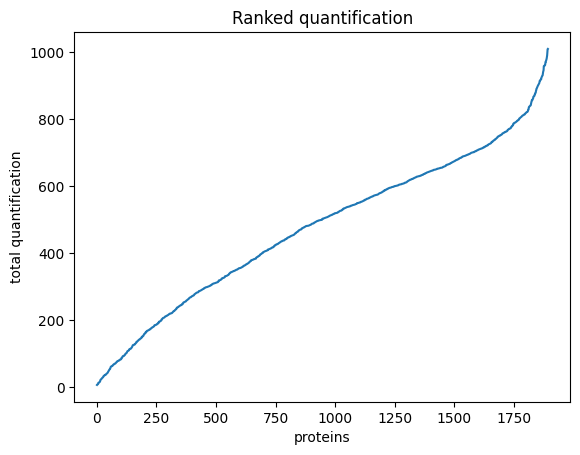

In [11]:
d.ranked_quantification_plot()

The Y-axis shows the total quantification, the X-axis descibes the index of the ranked proteins.
The line shows a typical S-shape seen in proteomics.

#### Read count barplot

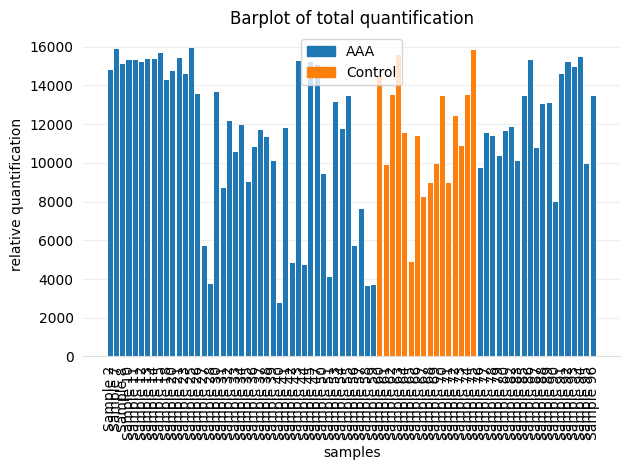

In [12]:
d.read_count_barplot()

The Y-axis shows the total amount quantified, the X-axis indicates the different samples. Orange bars are controls and blue bars are AAA.

#### read count barplot (median)

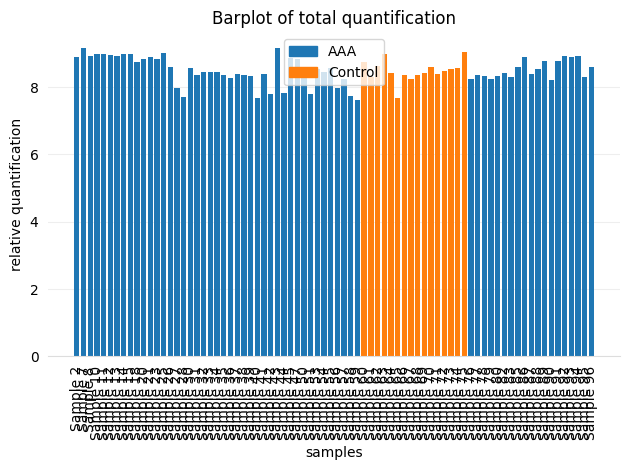

In [13]:
d.read_count_barplot(method="median")

The Y-axis shows the median quantification of all proteins for each sample, the X-axis indicates the different samples. Orange bars are controls and blue bars are AAA.

### Missing values

#### Ranked missing plot

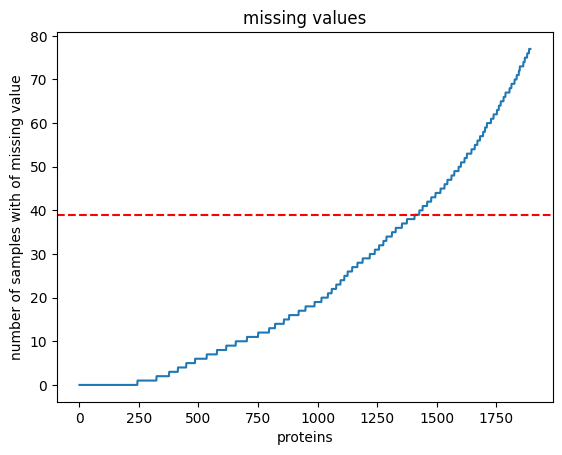

In [14]:
d.ranked_missing_plot(hline=round(df.shape[0]/2))

The Y-axis show the number of samples whom have missing values for a given protein, the X-axis shows the index of the ranked list of proteins. The red dotted line indicates 50% of the samples 

#### Missing abundance plot

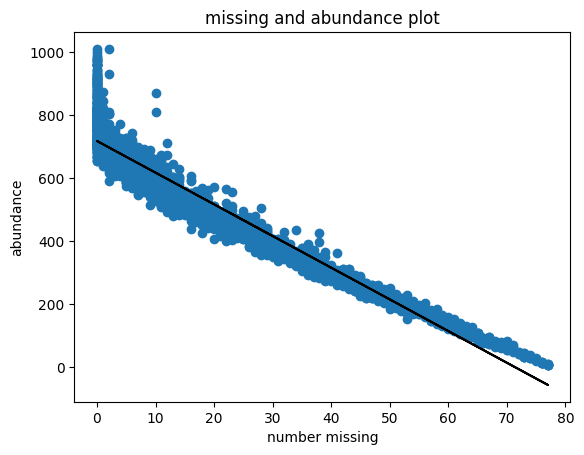

In [15]:
d.missing_abundance_plot()

The Y-axis shows the abundance of each protein (total sum), the X-axis shows the number of missing values for each protein. The black line is a regression line.

#### Missing abundance plot (mean)

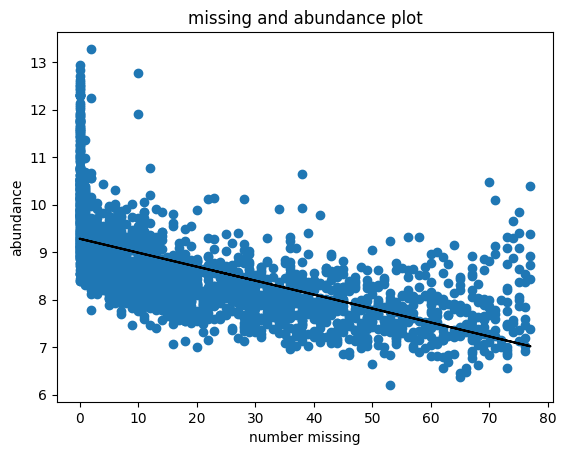

In [16]:
d.missing_abundance_plot(method="mean")

The Y-axis shows the abundance of each protein (mean), the X-axis shows the number of missing values for each protein.line.

#### Missing abundance plot (median)

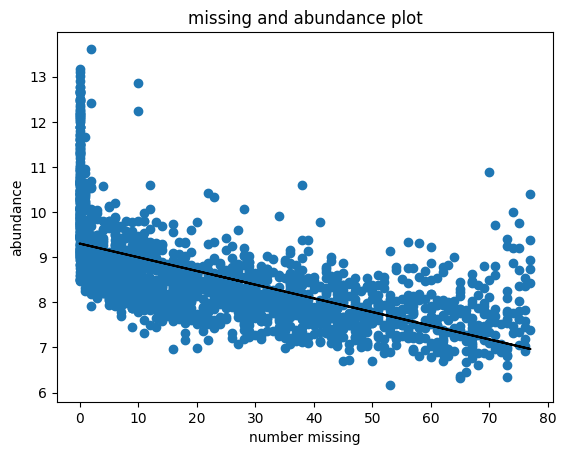

In [17]:
d.missing_abundance_plot(method="median")

The Y-axis shows the abundance of each protein (median), the X-axis shows the number of missing values for each protein.

#### Missing abundance plot (min)

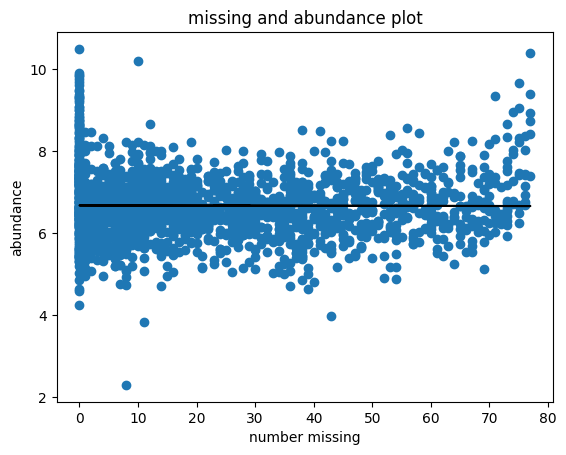

In [18]:
d.missing_abundance_plot(method="min")

The Y-axis shows the lowest measured value for each protein, the X-axis shows the number of missing values for each protein

### Normality tests

#### Mean median plot (log)

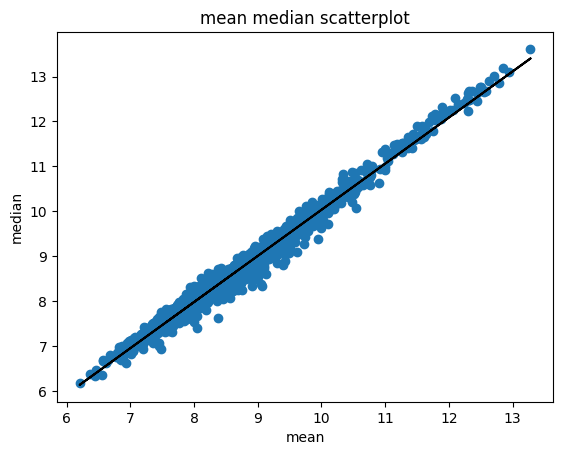

In [19]:
d.mean_median_plot()

The Y-axis shows the median of each protein, the X-axis shows mean for each protein. This is conducted on log scaled data.

#### Density plot (log)

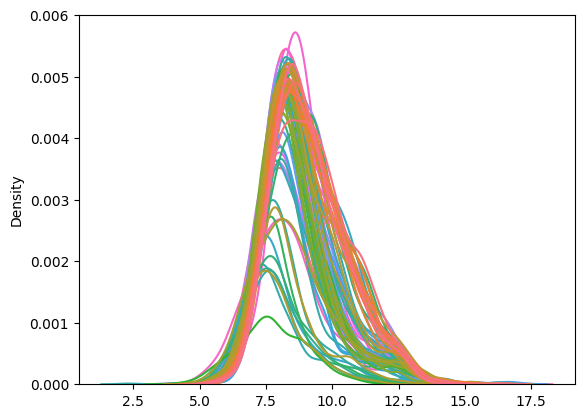

In [20]:
d.density_plot()

The Y-axis describes the density (estimated probability density), the X-axis protein values.

#### Mean median plot

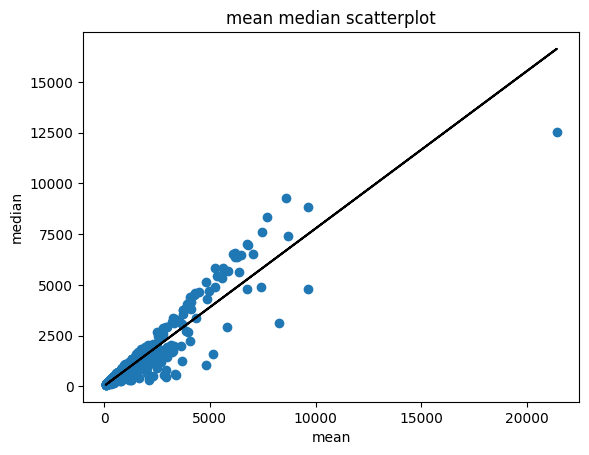

In [21]:
d.exponentiate()
d.mean_median_plot()

The Y-axis shows the median of each protein, the X-axis shows mean for each protein.

#### Density plot

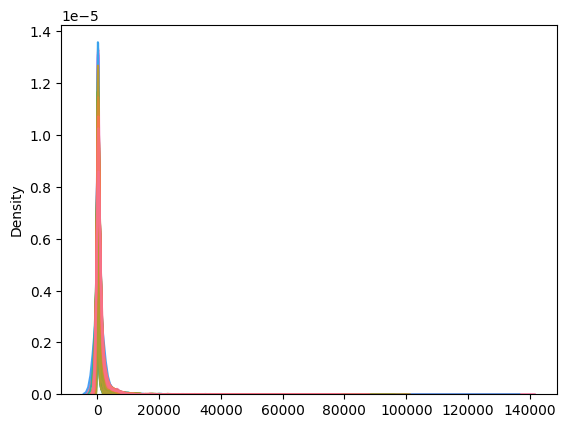

In [22]:
d.density_plot()

The Y-axis describes the density (estimated probability density), the X-axis protein values.

#### Shapiro Wilk test

In [23]:
d.shapiro(sign_only=True)

statistic       p-value     protein    group
11     0.794511  3.934856e-02       EEF1G  Control
20     0.927736  2.439620e-02         RAN      AAA
21     0.646467  1.330676e-03         RAN  Control
25     0.725537  7.471158e-03      LGALS1  Control
29     0.794288  3.926067e-02      CAPZA1  Control
...         ...           ...         ...      ...
3276   0.859012  1.654798e-04    IGLV1-47      AAA
3283   0.428676  3.457597e-05        ANK1  Control
3302   0.878983  5.669010e-04    IGLV2-18      AAA
3459   0.776767  2.527533e-02     IGLV3-1  Control
3480   0.746418  6.862983e-07  cRAP-KRT15      AAA

[230 rows x 4 columns]

230 proteins are deemend not normally distributed by the Shapiro-Wilk test for both groups.

### Shapiro Wilk test and Q-Q plots
* Log-transformend
* Missing filtering at 0%

Shape non-normal shapiro wilk (251, 4)
Shape data:  (78, 244)


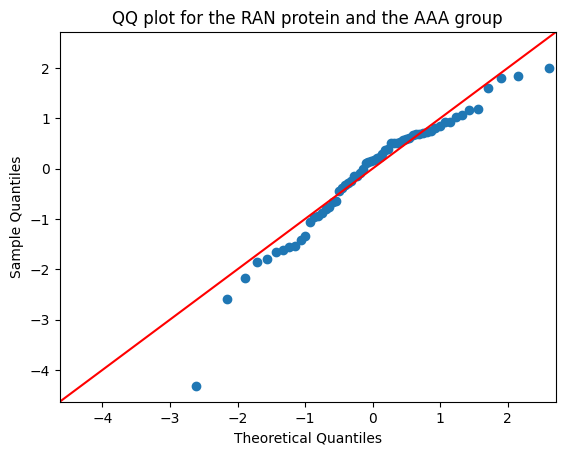

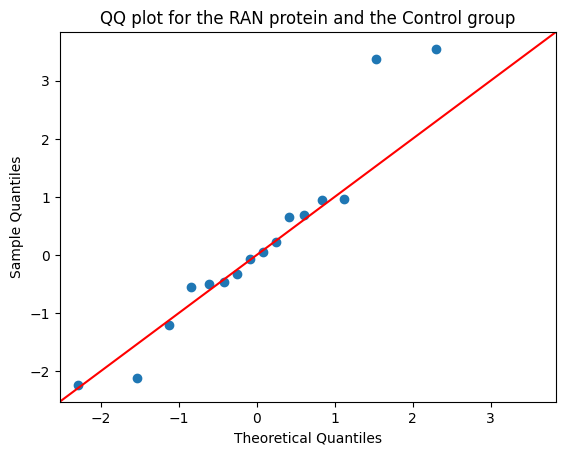

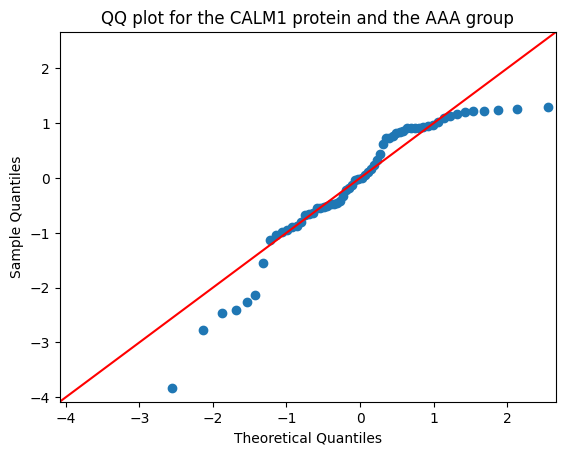

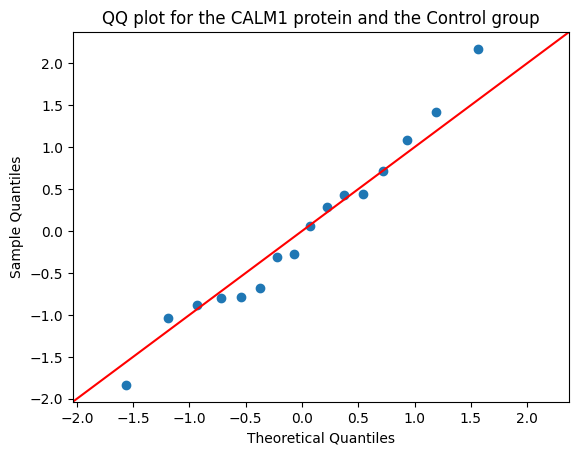

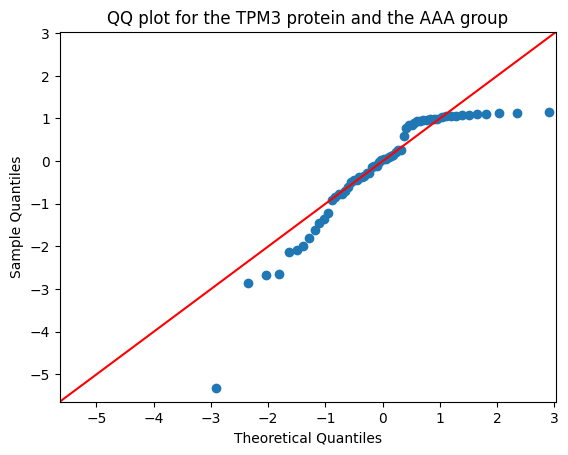

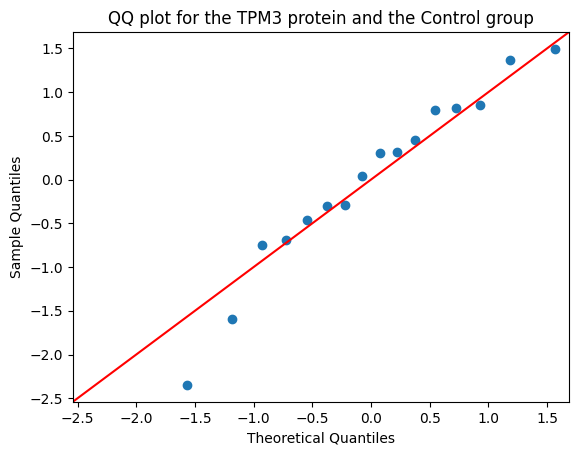

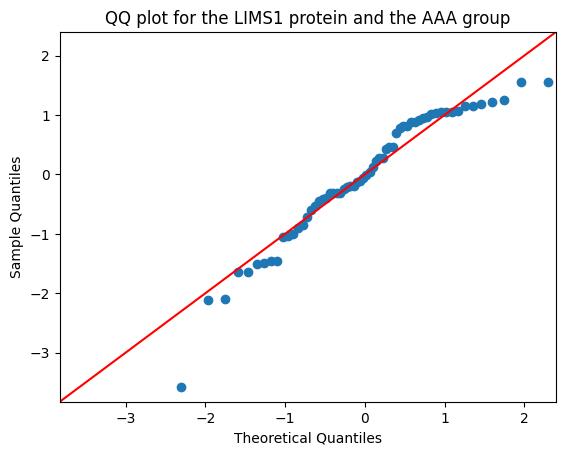

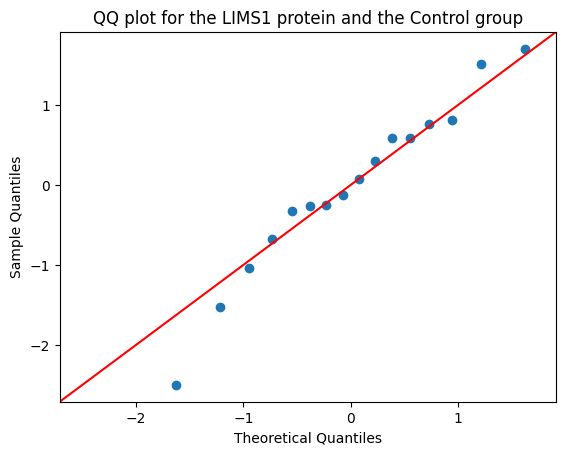

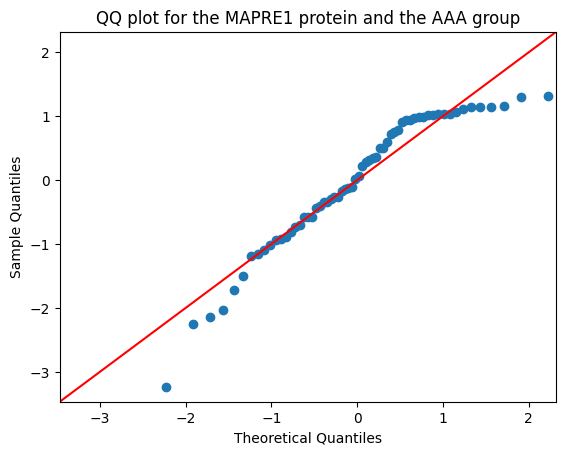

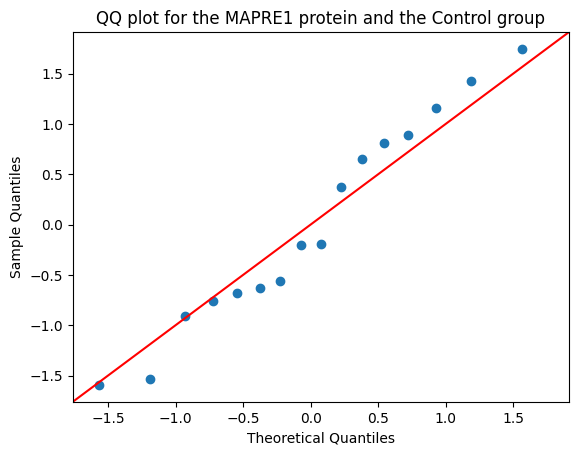

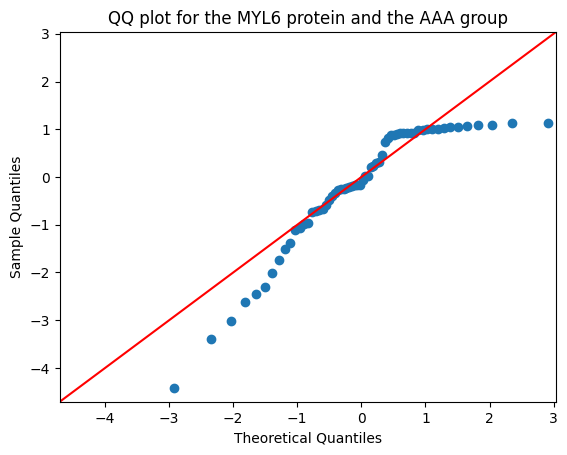

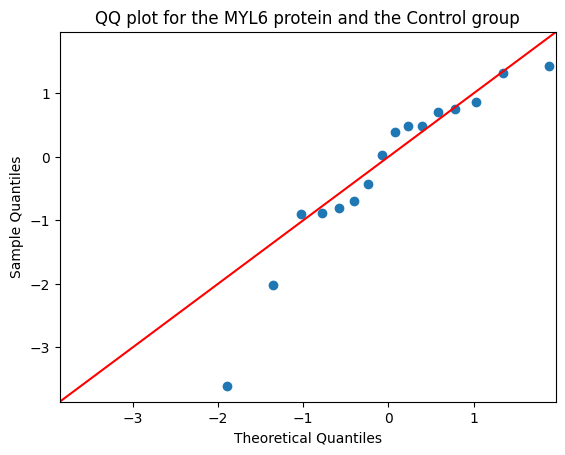

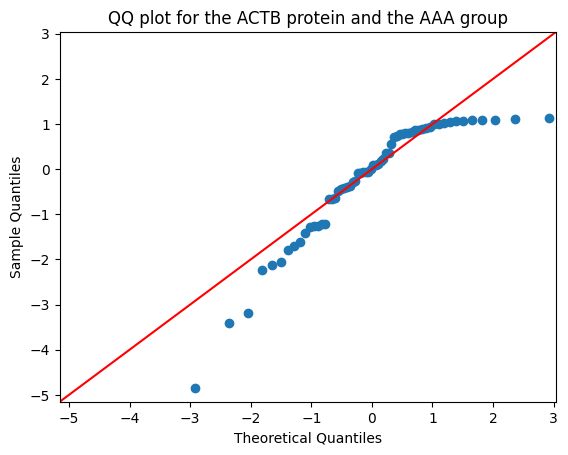

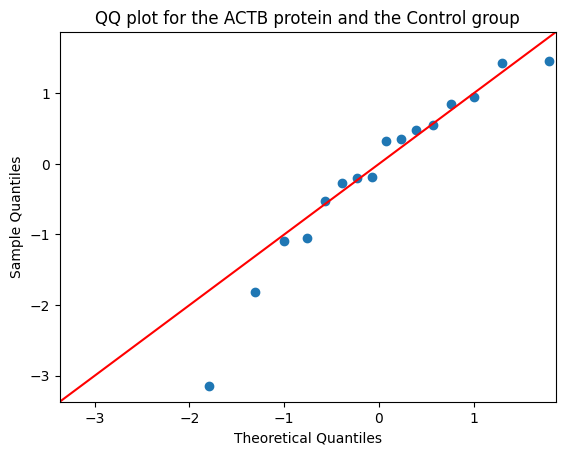

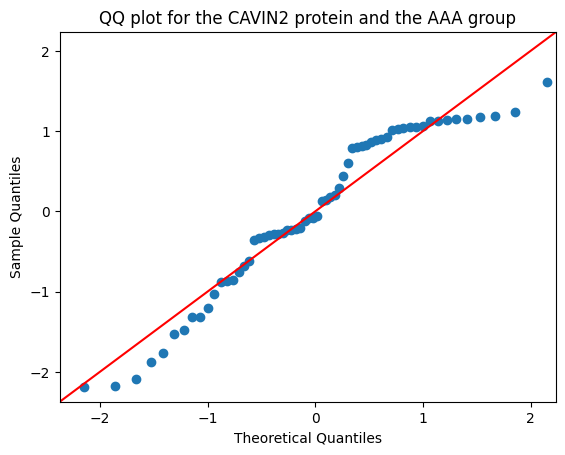

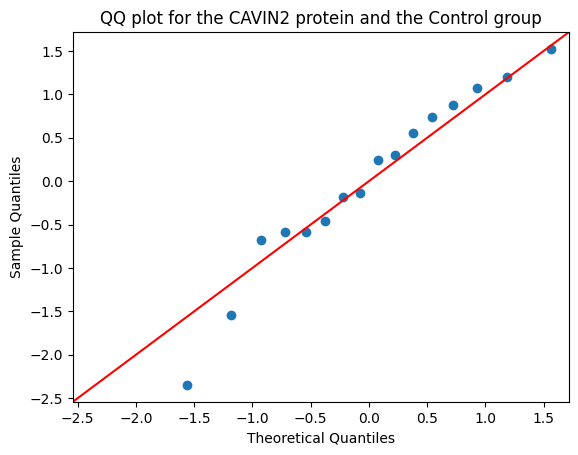

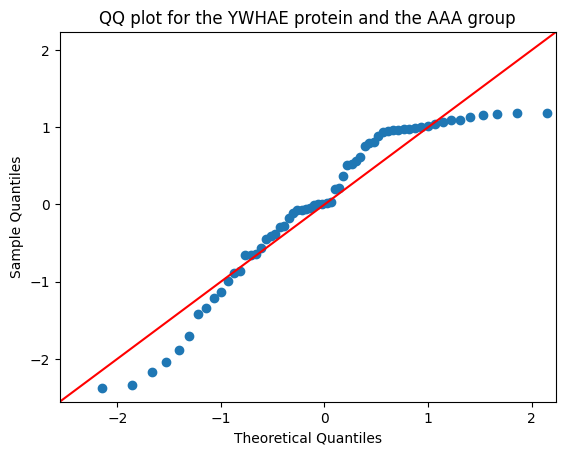

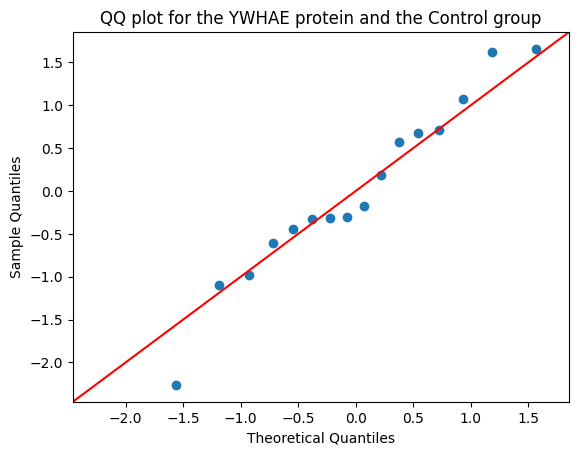

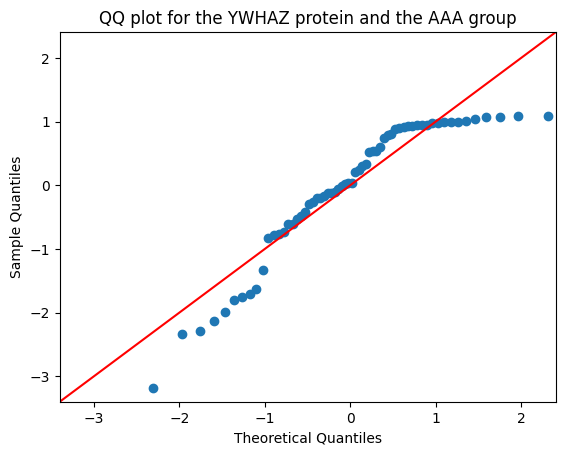

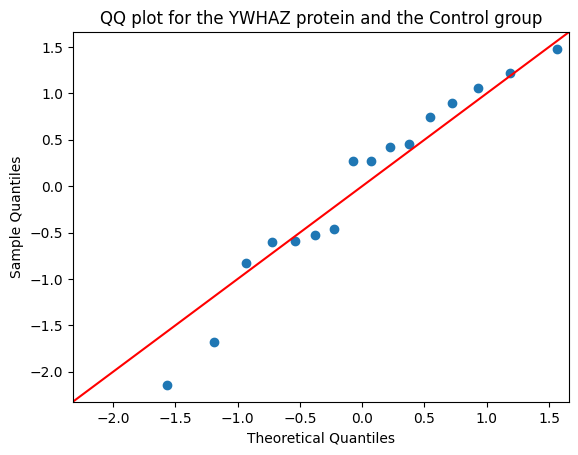

C:\Users\keimp\AAA_AMC\notebooks\..\Pipelines\DAP.py:328: RuntimeWarning: overflow encountered in scalar power
  self.df.at[n, p] = 2 ** self.df.at[n, p]


In [34]:
## Normality testing
d.missing_filtering(0)
d.log_transform()
print("Shape non-normal shapiro wilk", d.shapiro(sign_only=True).shape)
print("Shape data: ", d.get_data()[d.get_proteins()].shape)

#Create Q-Q plots
t = list(d.shapiro(sign_only=True)["protein"])
x = 0
while x < 10:
    d.qq(proteins=[t[x]])
    x+=1

#Reset to previous settings
d.set_proteins(proteins)
d.exponentiate()

### Variance testing

In [24]:
d.variance_test(method="levene", sign_only=True, multiple_correction="").shape

(17, 3)

17 proteins identified which have different variances

### Log transform data

In [25]:
d.log_transform()

### Boxplot of quantification

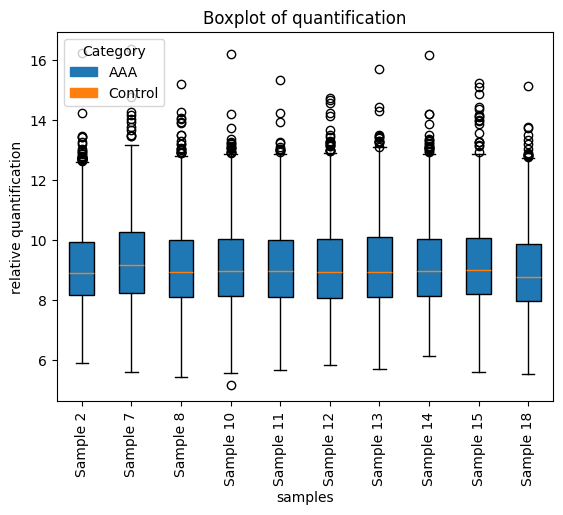

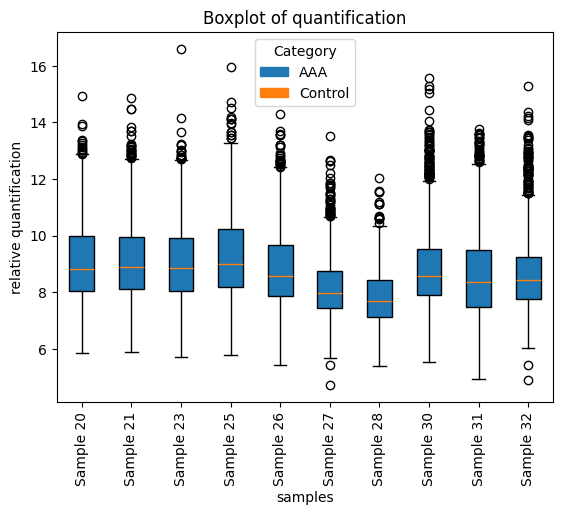

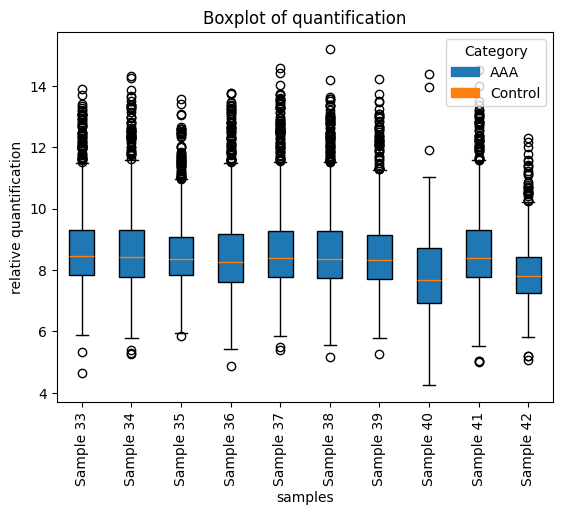

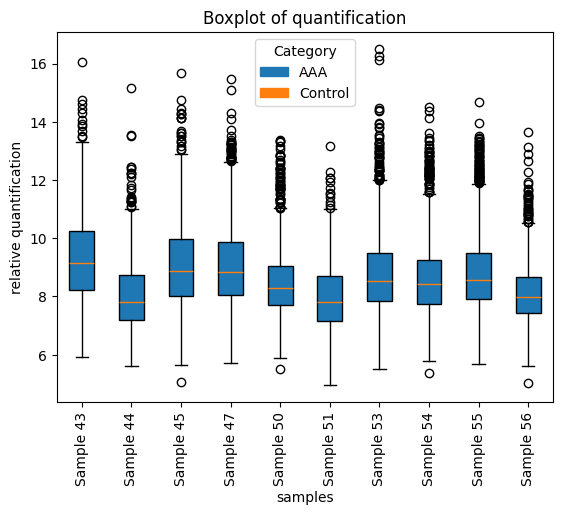

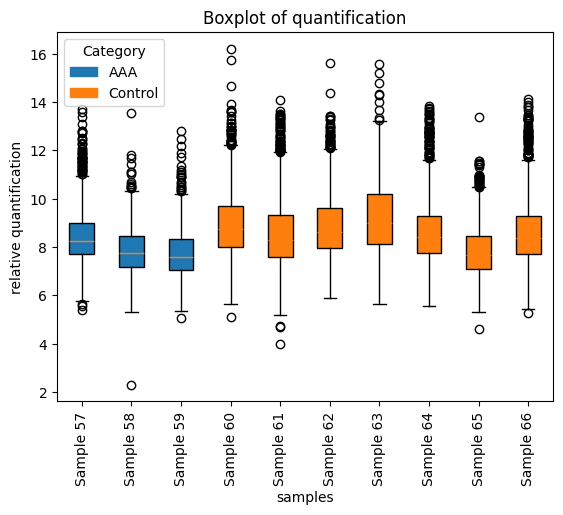

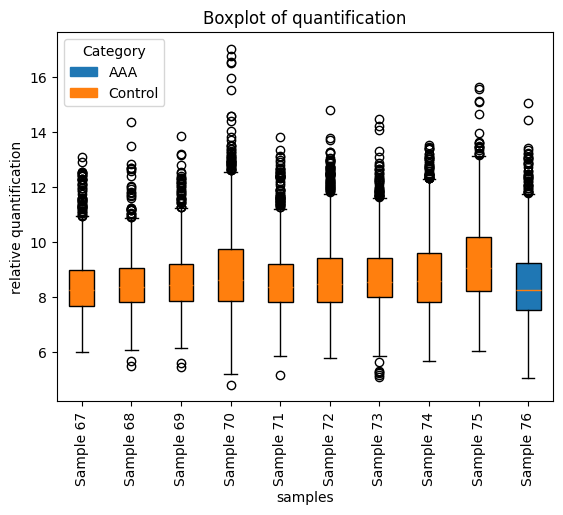

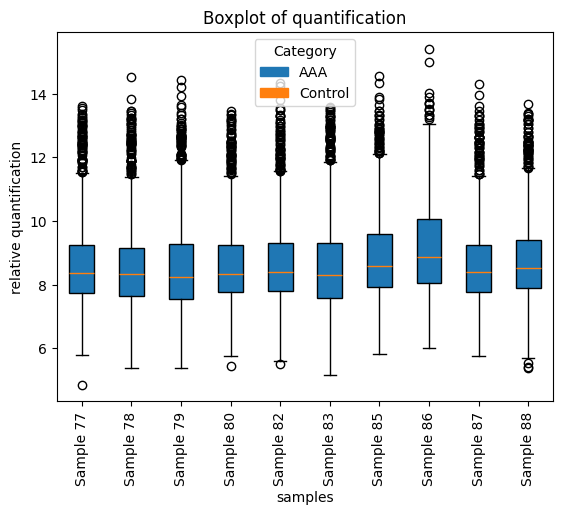

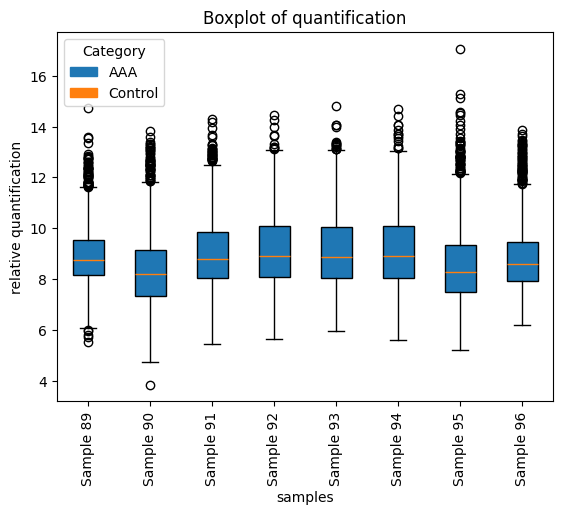

In [26]:
x = 0
while x+10 < len(d.get_data()):
    d.read_count_boxplot(n_samples=[x,x+10], log_transformed=False)
    x+=10
d.read_count_boxplot(n_samples=[x, len(d.get_data())], log_transformed=False)

For the boxplots above, the Y-axis indicates the qountification for each protein. The X-axis shows the different samples.

Data was supplied log-scaled and median normalized, for further testing of normalization see other notebooks. This notebook continues with no extra normalization.

### Distance heatmaps

#### Filter

In [27]:
#Exclude proteins with NAN's
d.missing_filtering(0)

#### Distance heatmap (euclidean)

C:\Users\keimp\AAA_AMC\notebooks\..\Pipelines\DAP.py:1826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_linkage = linkage(dm, method='average')
c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


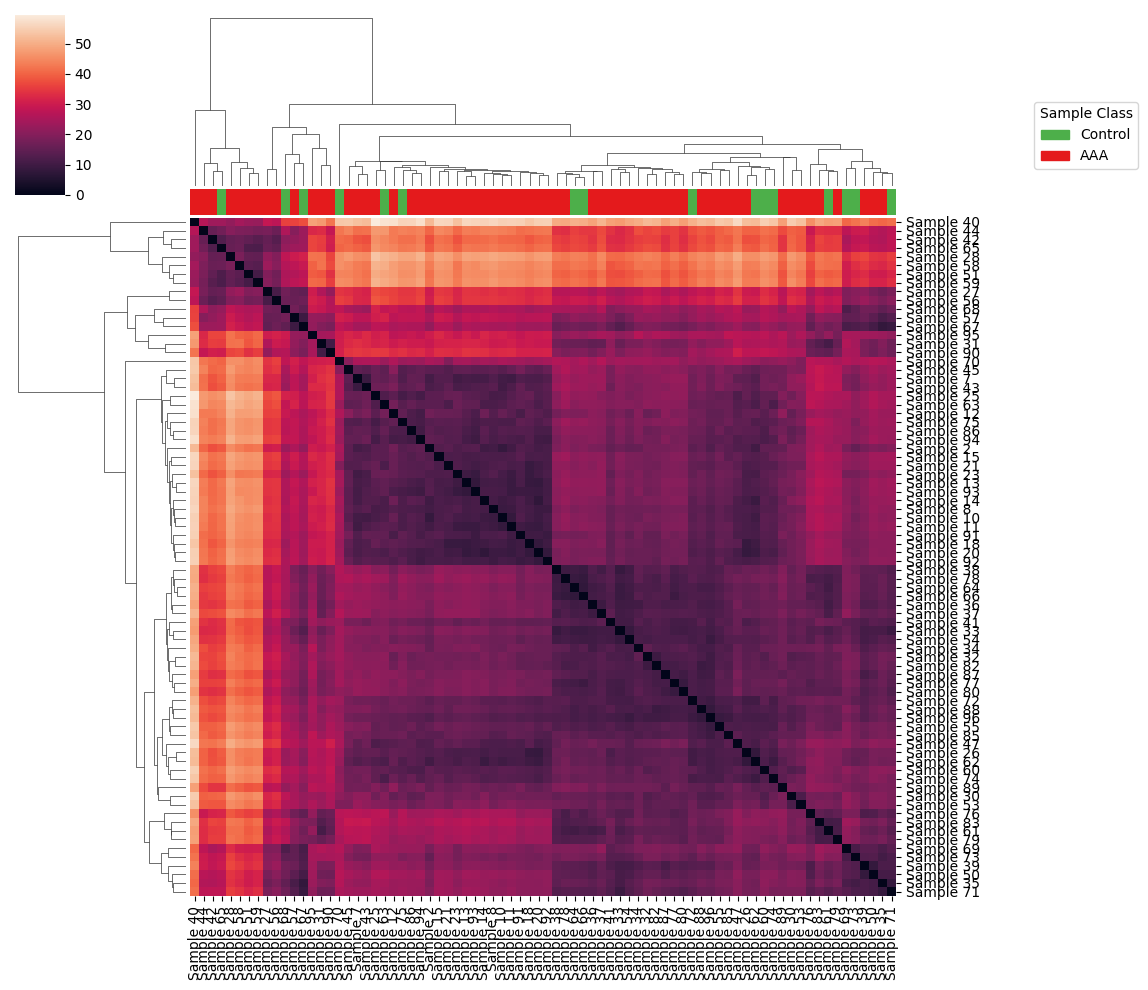

In [28]:
d.distance_heatmap(control_group="Control", treatment_group="AAA")

#### Distance heatmap (manhattan)

C:\Users\keimp\AAA_AMC\notebooks\..\Pipelines\DAP.py:1826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_linkage = linkage(dm, method='average')
c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


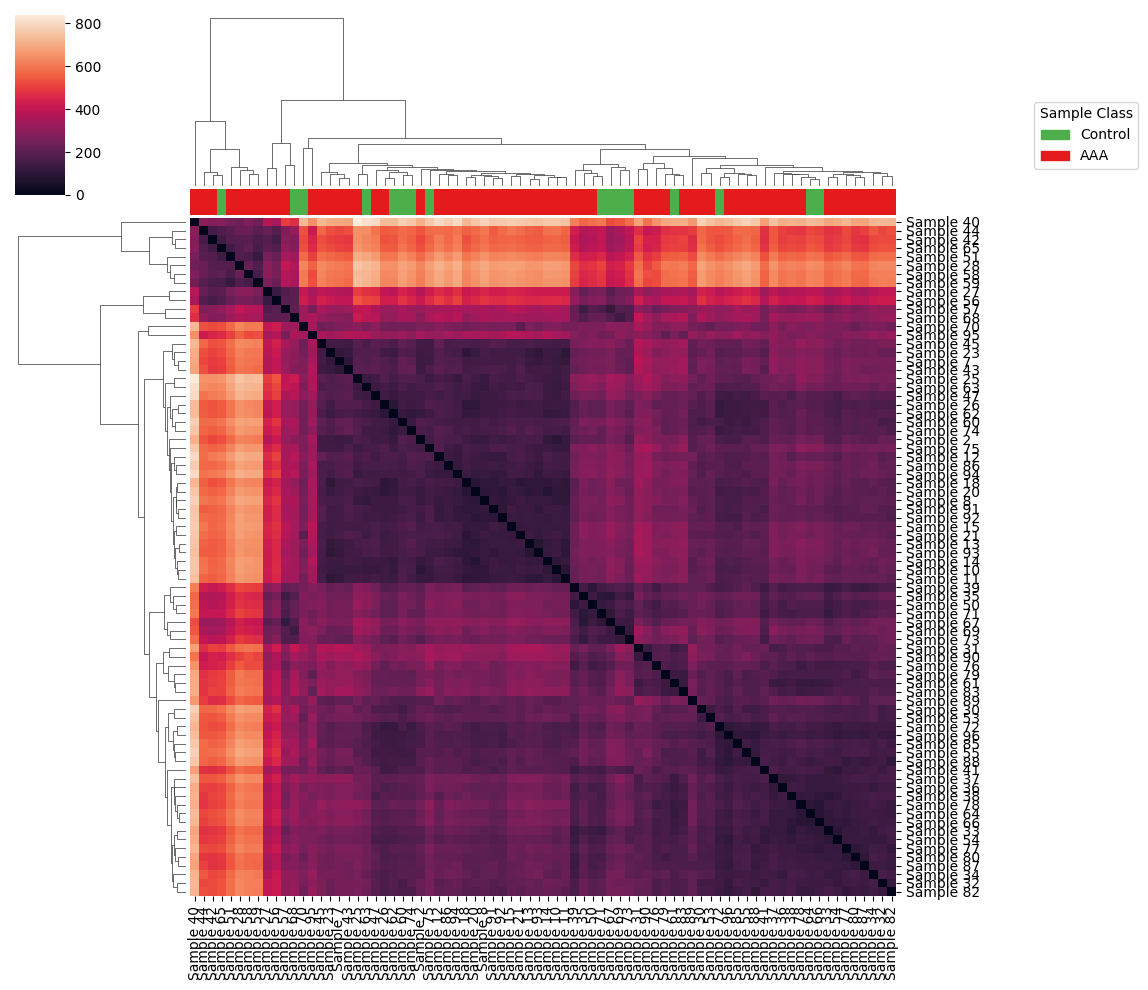

In [29]:
d.distance_heatmap(method="manhattan", control_group="Control", treatment_group="AAA")

#### Distance heatmap (poisson)

C:\Users\keimp\AAA_AMC\notebooks\..\Pipelines\DAP.py:1826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_linkage = linkage(dm, method='average')
c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


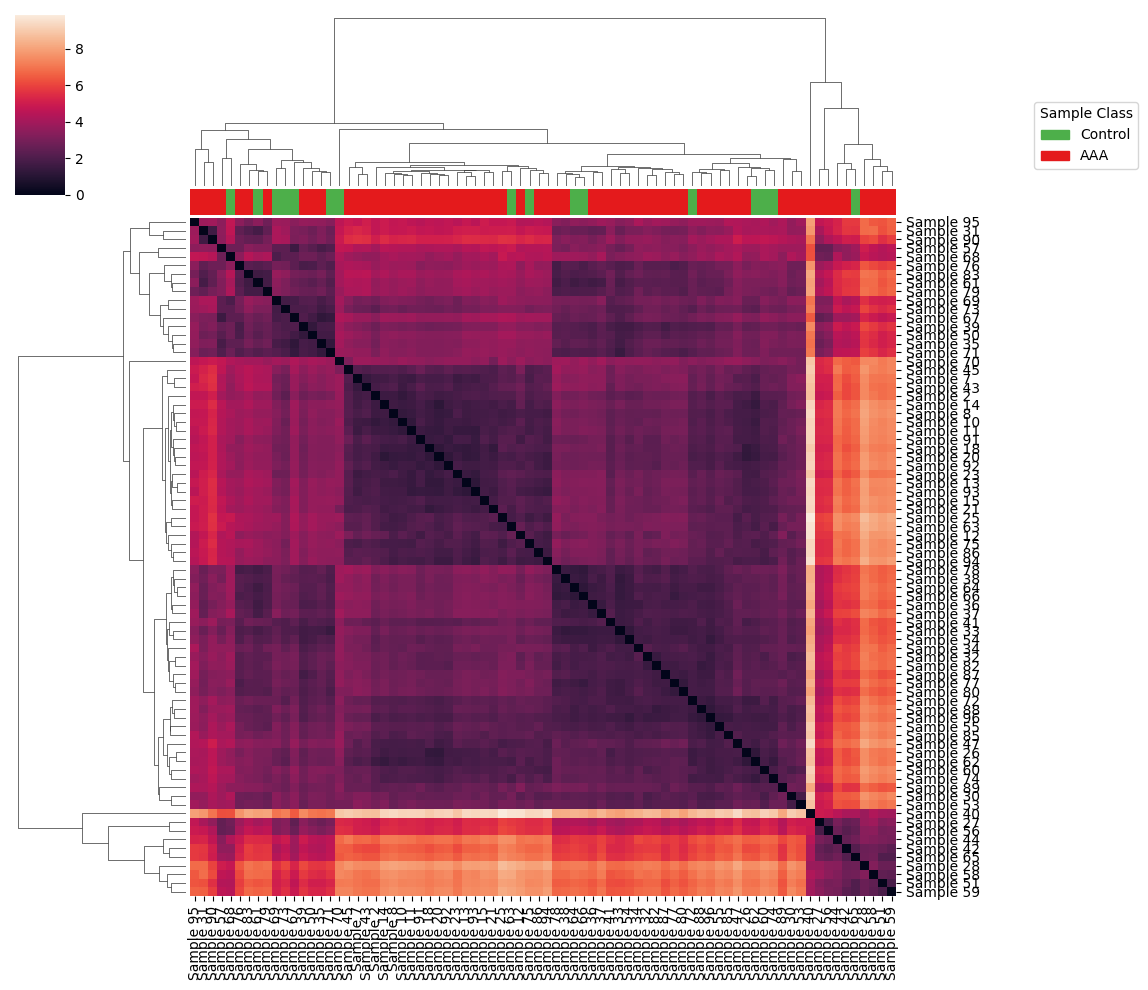

In [30]:
d.distance_heatmap(method="poisson", control_group="Control", treatment_group="AAA")

### Multi dimensional scaling plots

#### Multi dimensional scaling plot(euclidian distance)

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


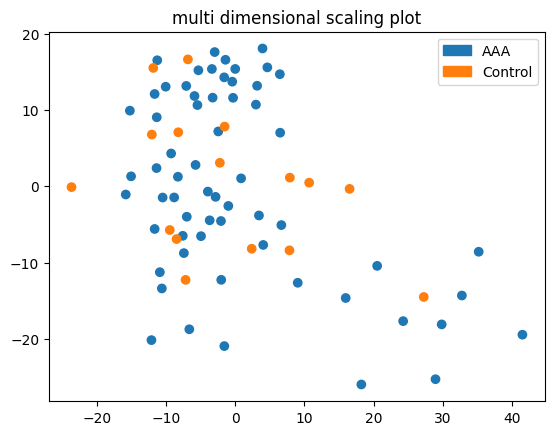

In [31]:
d.multi_dimensional_scaling_plot(d.euclidian_distance_matrix())

#### Multi dimensional scaling plot(manhattan distance)

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


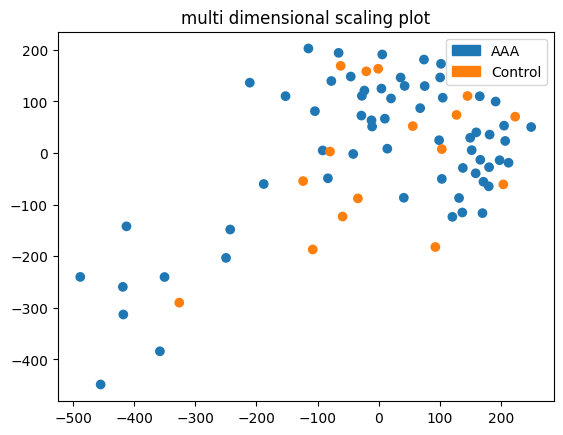

In [32]:
d.multi_dimensional_scaling_plot(d.manhattan_distance_matrix())

#### Multi dimensional scaling plot(poisson distance)

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


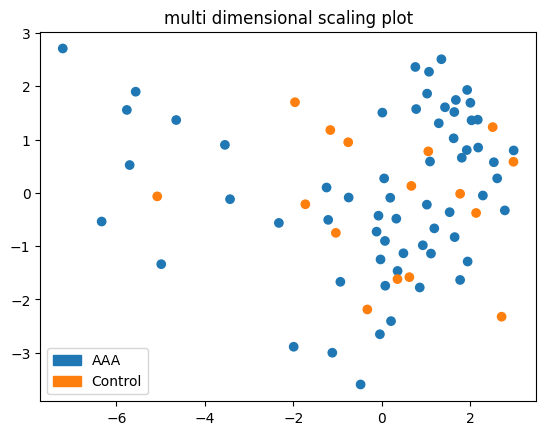

In [33]:
d.multi_dimensional_scaling_plot(d.poisson_distance_matrix())

### Correlation heatmaps

#### Sample correlation heatmap

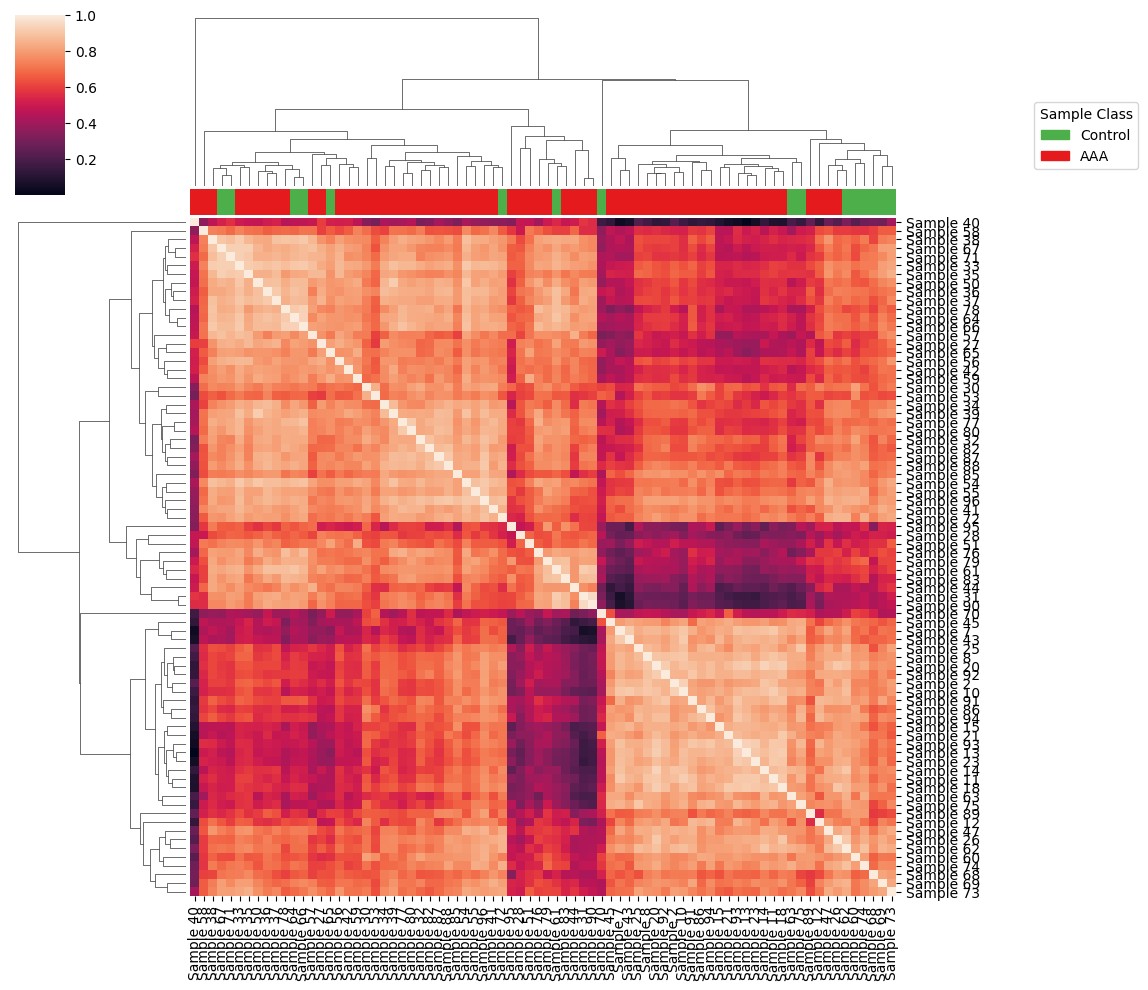

In [34]:
d.sample_correlation_heatmap(control_group="Control", treatment_group="AAA")

#### Protein correlation heatmap

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


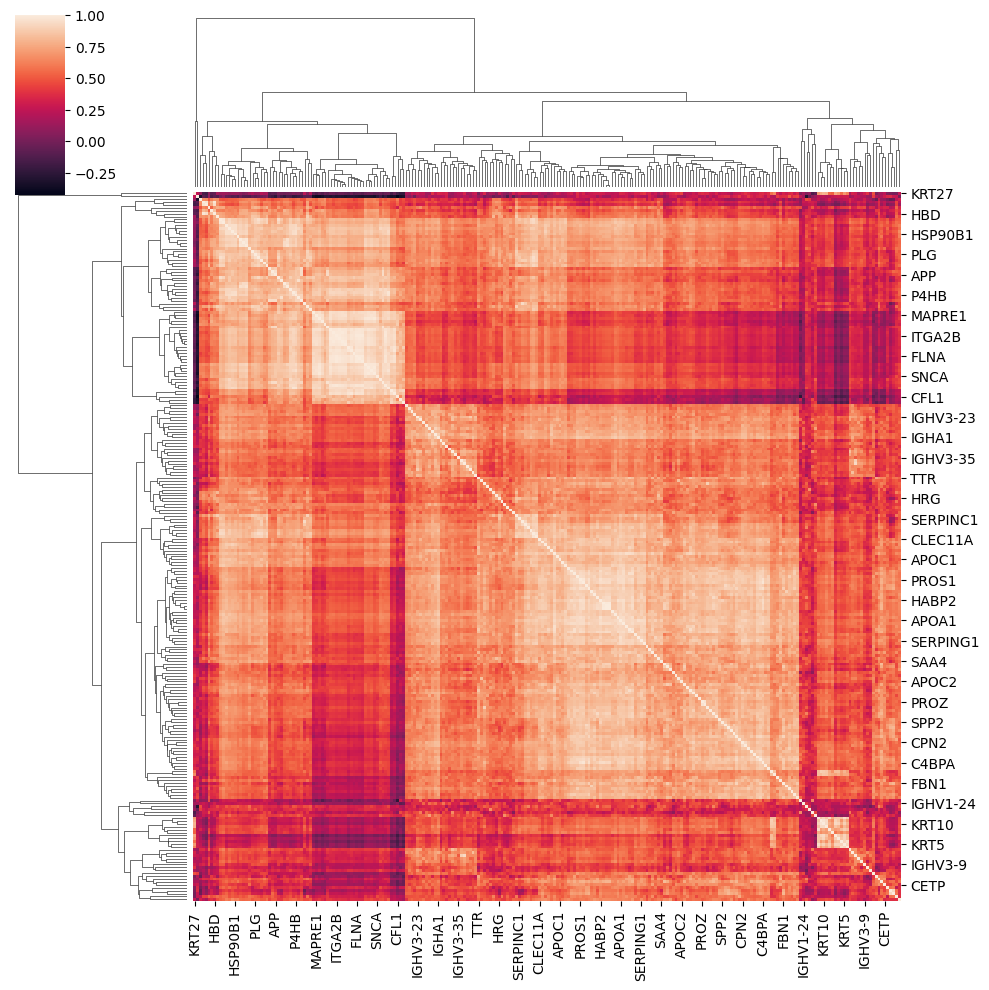

In [35]:
d.protein_correlation_heatmap()

### PCA plot

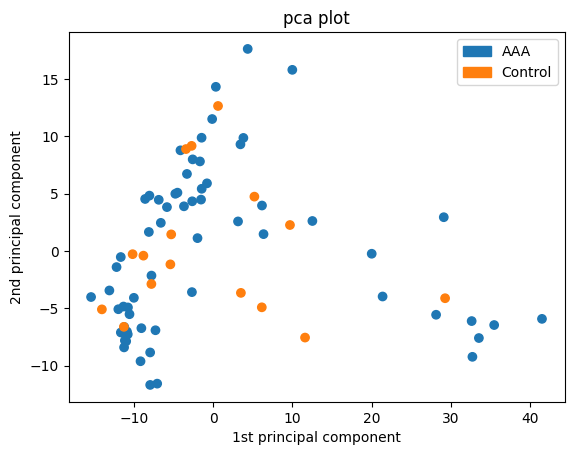

In [36]:
d_data = d.get_data()
f, ft = d.pca()
d.pca_plot()
d.set_data(d_data)

### TSNE-plot (euclidean)

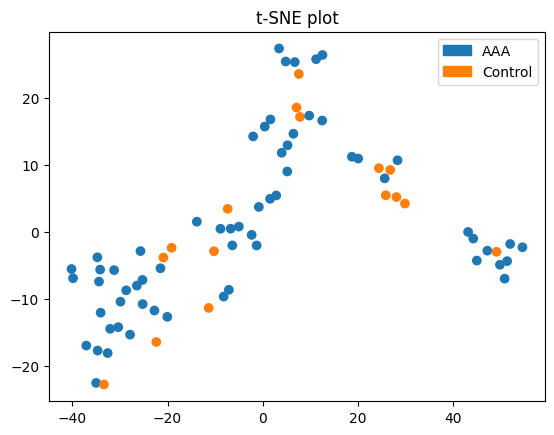

In [37]:
d.tsne_plot(d.euclidian_distance_matrix(), perplexity = 5)

### UMAP plot

c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


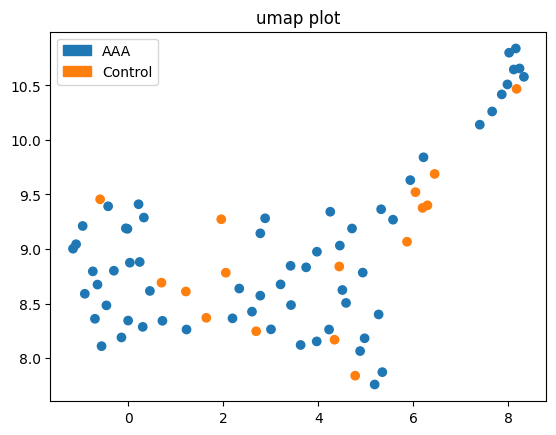

In [38]:
d.umap_plot()

## Volcano plots

### Baseline
* No normalization
* No proteins with missing values
* No imputation
* Log-transformend
* No multiple testing correction
* t-test

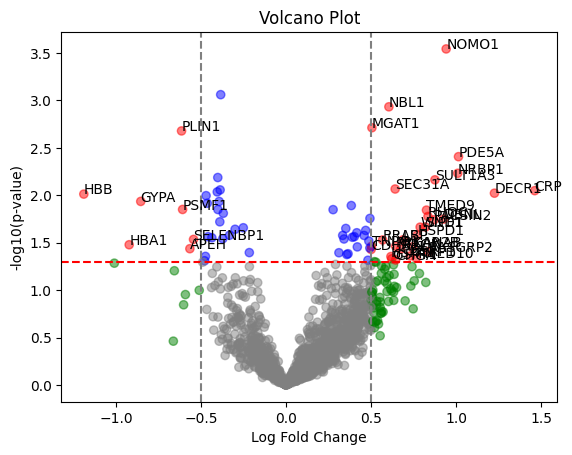

In [60]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="", norm_method="", threshold=50, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=10, order="lin", multiple_correction="",
                modeling=False)

In [61]:
len(dic)

36

In [62]:
dic.keys()

dict_keys(['PSMF1', 'NRGN', 'PRKAR2B', 'HSPD1', 'MGAT1', 'SULT1A3', 'PACSIN2', 'APEH', 'RASGRP2', 'GANAB', 'CRP', 'HSPA9', 'CDHR2', 'DECR1', 'LBP', 'NRBP1', 'GSPT1', 'SELENBP1', 'TMED9', 'TMED10', 'PDE5A', 'CHGA', 'HBB', 'SEC31A', 'TNPO1', 'HBA1', 'NOMO1', 'CSRP1', 'PLIN1', 'RHOC', 'NBL1', 'RRAS', 'SND1', 'WIPF1', 'GYPA', 'DBNL'])

### Baseline (threshold)
* Only complete data

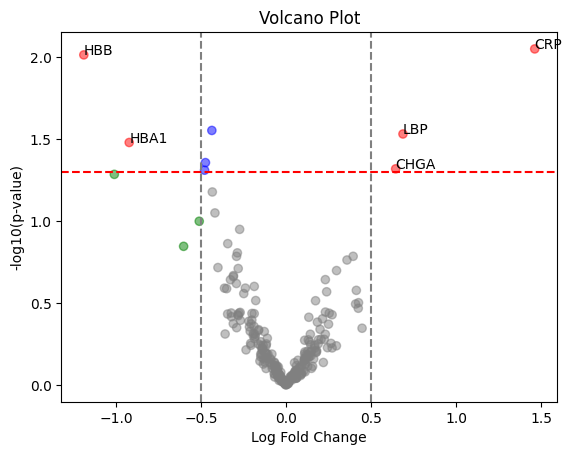

In [66]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="", norm_method="", threshold=0, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=10, order="lin", multiple_correction="",
                modeling=False)

In [67]:
dic

{'CRP': [0.008942381466111208, 1.461945588950373],
 'LBP': [0.02951247524911523, 0.6873660608801906],
 'CHGA': [0.04815545756178057, 0.6444737170568757],
 'HBB': [0.009723979165335416, -1.1885734629947802],
 'HBA1': [0.03325599941658276, -0.9218820803209198]}

### Baseline (BH)

Base line but with benjamini-hochberg multiple testing correction

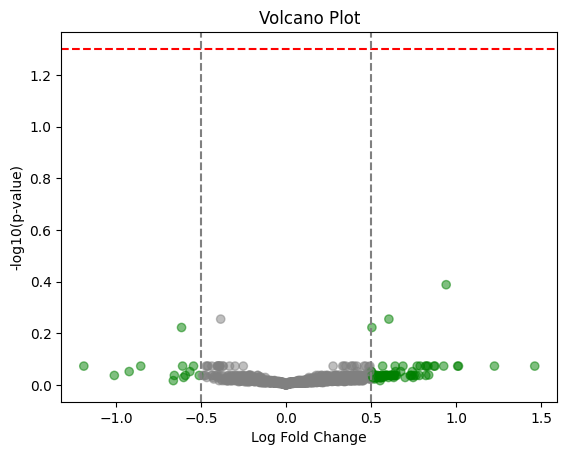

In [51]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="", norm_method="", threshold=50, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=10, order="lin", multiple_correction="bh",
                modeling=False)

### Baseline (linear)

Baseline but with linear significance test

In [72]:
#Replace - with _ in column names
proteins = [i.replace("-", "_") for i in proteins]
df.columns = df.columns.str.replace('-', '_')

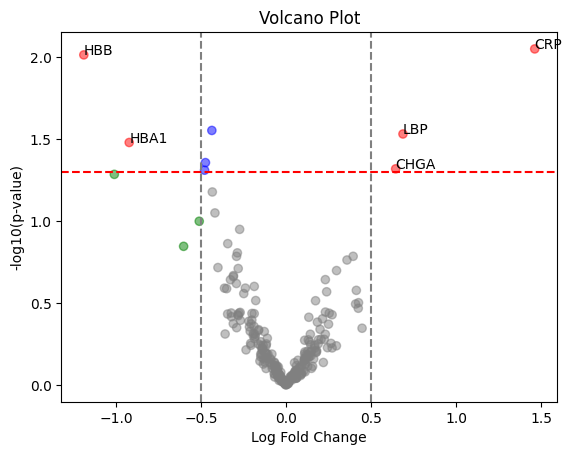

In [73]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="", norm_method="", threshold=0, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="lin",
                nn_knn=10, order="lin", multiple_correction="",
                modeling=False)

### Baseline (anova)

Baseline but with anova significance test

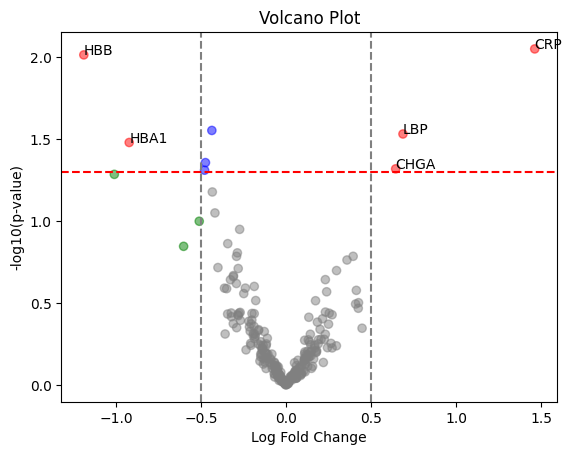

In [35]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="", norm_method="", threshold=0, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="anova",
                nn_knn=10, order="lin", multiple_correction="",
                modeling=False)

### Imputed 

Imputation methods
* Average imputation
* k-nearest neighbour imputation (n: 2, 4, 8)
* No normalization
* No multiple testing correction
* t-test

Missing thresholds: 25%, 50%

#### Average, 25%

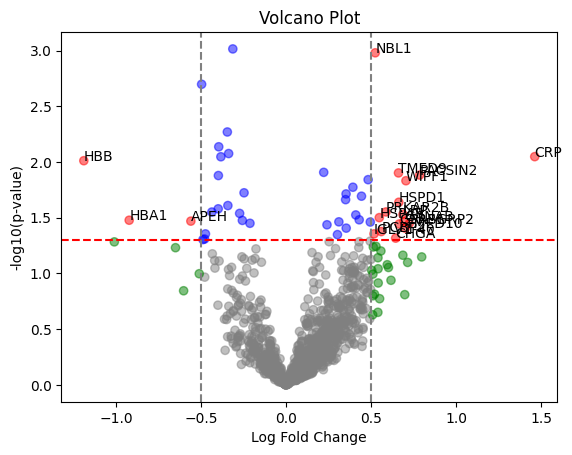

In [42]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="avg", norm_method="", threshold=25, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=10, order="lin", multiple_correction="",
                modeling=False)

#### Average, 50%

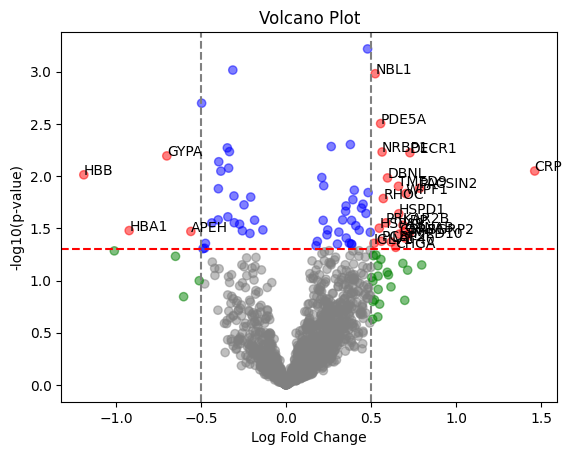

In [43]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="avg", norm_method="", threshold=50, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=10, order="lin", multiple_correction="",
                modeling=False)

#### K-NN 2, 25%

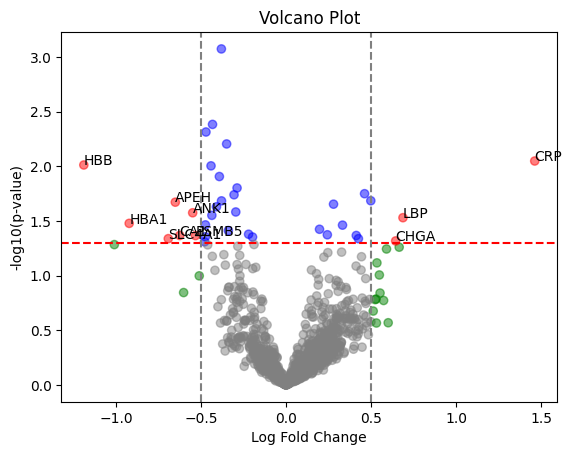

In [44]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="knn", norm_method="", threshold=25, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=2, order="lin", multiple_correction="",
                modeling=False)

#### K-NN 2, 50%

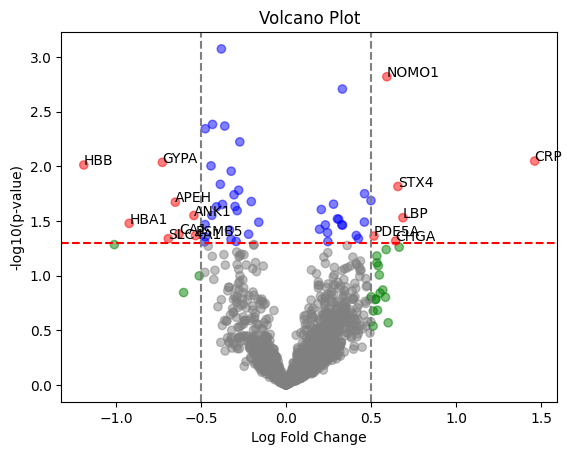

In [45]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="knn", norm_method="", threshold=50, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=2, order="lin", multiple_correction="",
                modeling=False)

#### K-NN 4, 25%

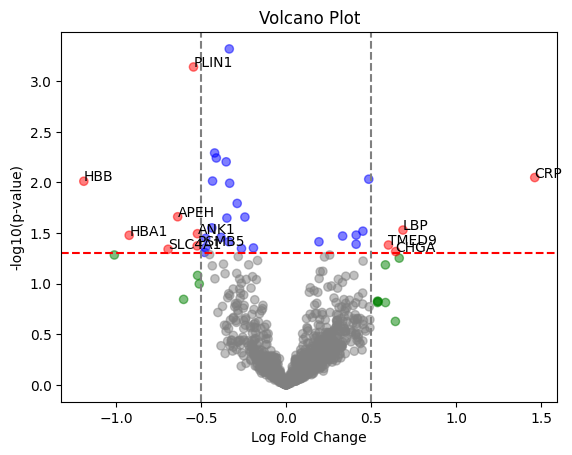

In [46]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="knn", norm_method="", threshold=25, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=4, order="lin", multiple_correction="",
                modeling=False)

#### K-NN 4, 50%

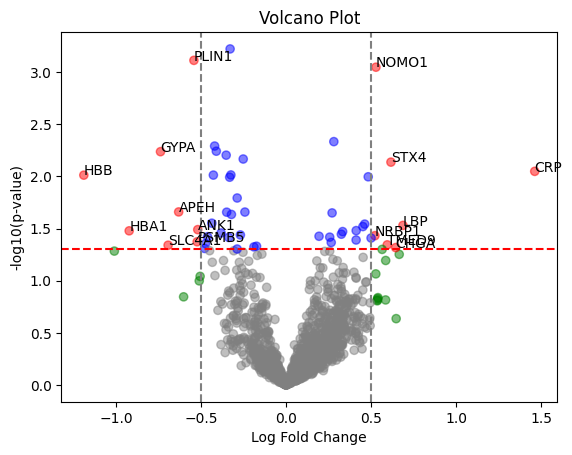

In [47]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="knn", norm_method="", threshold=50, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=4, order="lin", multiple_correction="",
                modeling=False)

#### K-NN 8, 25%

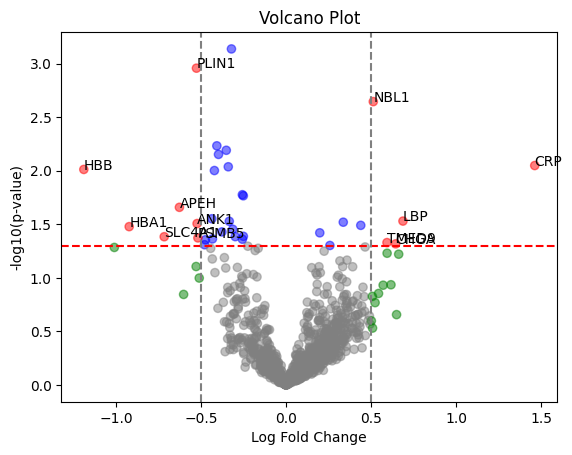

In [48]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="knn", norm_method="", threshold=25, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=8, order="lin", multiple_correction="",
                modeling=False)

#### k-nn 8, 50%

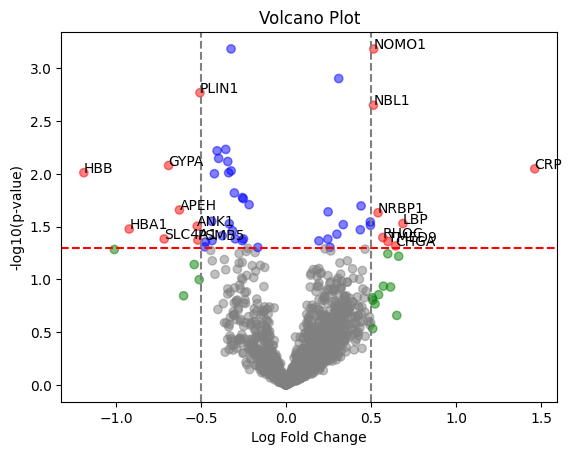

In [49]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="knn", norm_method="", threshold=50, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=8, order="lin", multiple_correction="",
                modeling=False)

### laplace 25%
* Laplace value of 4

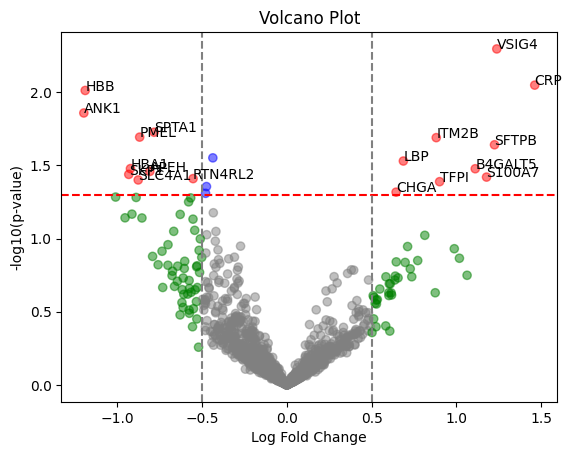

In [57]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="laplace", norm_method="", threshold=25, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=10, order="lin", multiple_correction="", laplace_value=4,
                modeling=False)

### laplace 50%
* Laplace value of 4

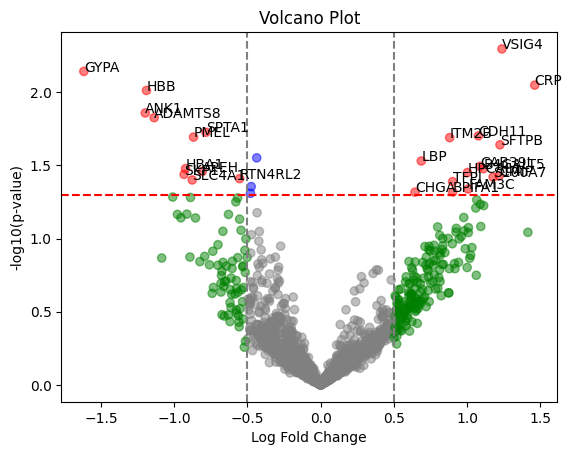

In [55]:
d = DAP(df, "Sample_index", "SimplePathology", proteins)
dic, st = d.pipeline(imp_method="laplace", norm_method="", threshold=50, log_transform=True,
                control_group="Control", treatment_group="AAA", 
                log_transformend=True, volcanoplot=True ,test="tt",
                nn_knn=10, order="lin", multiple_correction="", laplace_value=4,
                modeling=False)

### Correlation heatmap DAP

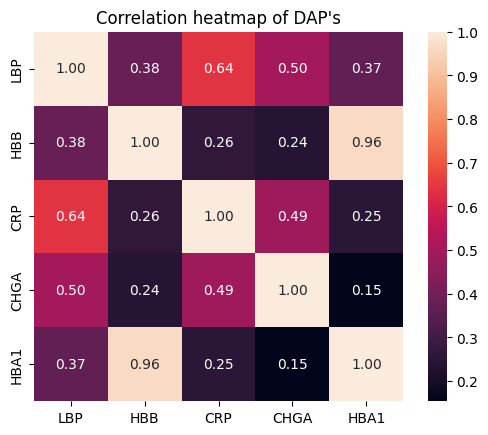

In [65]:
sns.heatmap(df[["LBP", 'HBB', 'CRP', "CHGA", "HBA1"]].corr(), annot=True, fmt=".2f", square=True)
plt.title("Correlation heatmap of DAP's")
plt.show()

### AAA size and DAP correlation

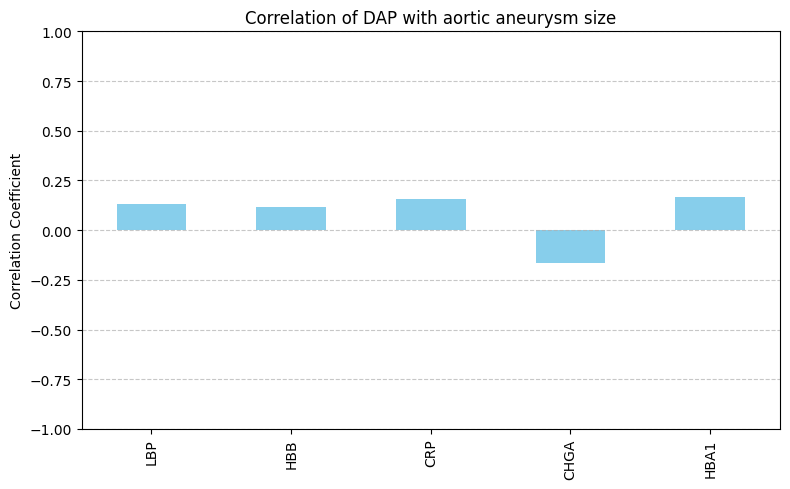

(57, 6)


In [83]:
tdf = df[["LBP", 'HBB', 'CRP', "CHGA", "HBA1", "Size_AA"]].dropna()
tdf['Size_AA'] = pd.to_numeric(tdf['Size_AA'], errors='coerce')

correlations = tdf.drop(columns='Size_AA').corrwith(tdf['Size_AA'], method='spearman')

plt.figure(figsize=(8, 5))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation of DAP with aortic aneurysm size')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(tdf.shape)